<a href="https://colab.research.google.com/github/Jhonatand26/MachineLearning/blob/main/course_project/ProyectoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo del proyecto del curso Machine Learning

In [ ]:
#@title Importación de elementos necesarios

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
#@title Importación del dataset desde Kaggle
# Configuración de Kaggle y descarga del dataset

!kaggle datasets download -d fatemehmehrparvar/obesity-levels
!unzip obesity-levels.zip

# Cargar el dataset en un DataFrame
import pandas as pd
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
License(s): Attribution 4.0 International (CC BY 4.0)
obesity-levels.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  obesity-levels.zip
replace ObesityDataSet_raw_and_data_sinthetic.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## EDA

In [ ]:
#@title Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
#@title Información estadística
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
#@title Información estadística de variables categóricas
df.describe(include='object')

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [ ]:
#@title Verificación de valores nulos
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
#@title Eliminación de datos duplicados
print("El tamaño original del dataset sin eliminar duplicados es: ", df.shape)
duplicate_rows_df = df[df.duplicated()]
print("El numero de filas duplicadas es: ", duplicate_rows_df.shape)
df = df.drop_duplicates()
print("El tamaño del dataset con la eliminación de duplicados es: ", df.shape)

El tamaño original del dataset sin eliminar duplicados es:  (2111, 17)
El numero de filas duplicadas es:  (24, 17)
El tamaño del dataset con la eliminación de duplicados es:  (2087, 17)


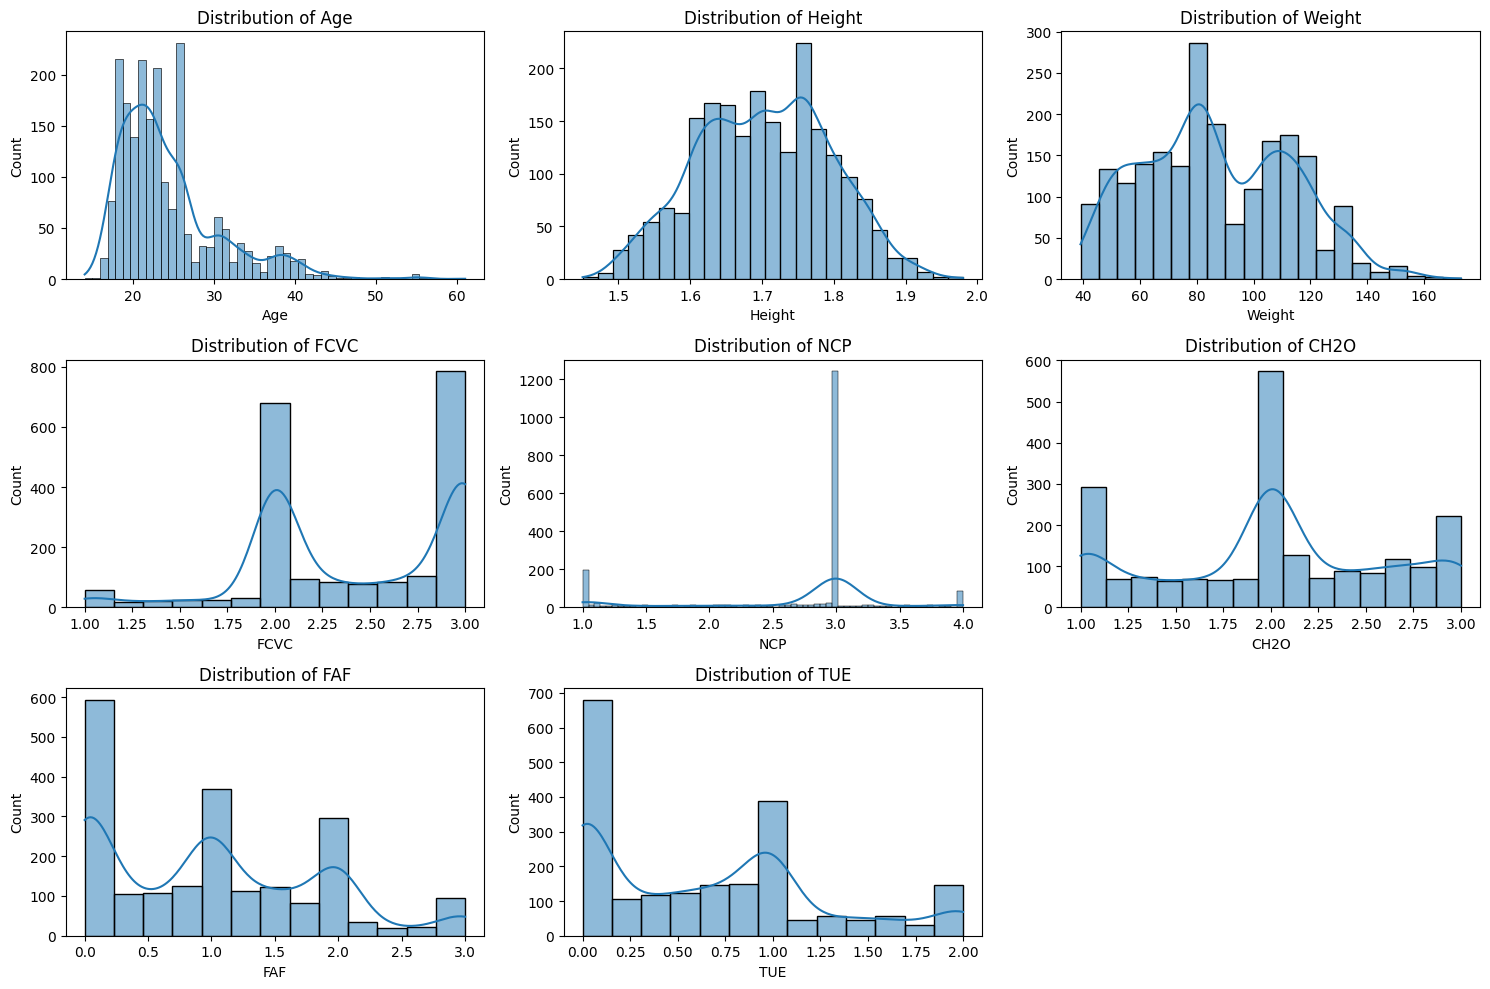

In [ ]:
#@title Visualización de la distribución de las variables numéricas.
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

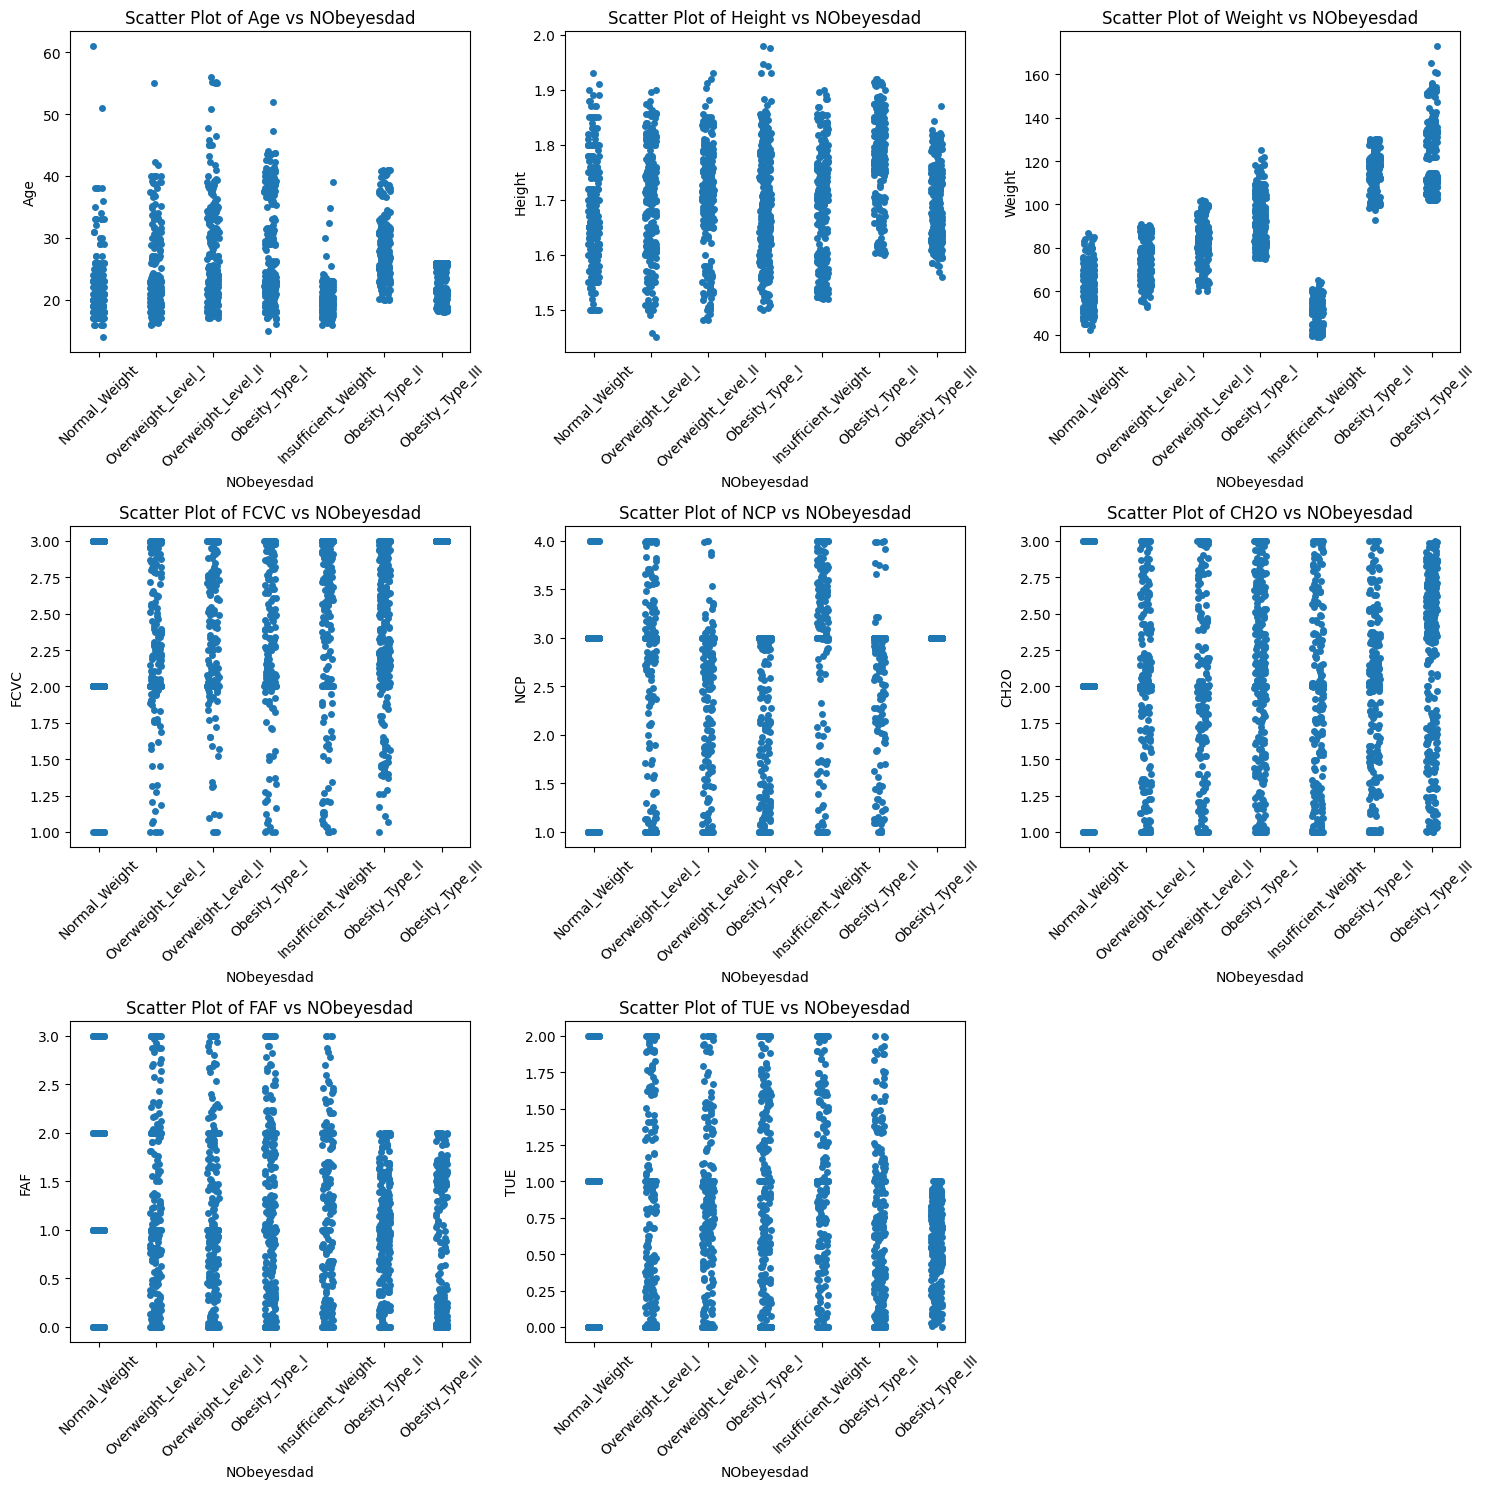

In [ ]:
#@title Configuración de los subplots para gráficos de dispersión
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.stripplot(data=df, x='NObeyesdad', y=col, jitter=True)
    plt.title(f'Scatter Plot of {col} vs NObeyesdad')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

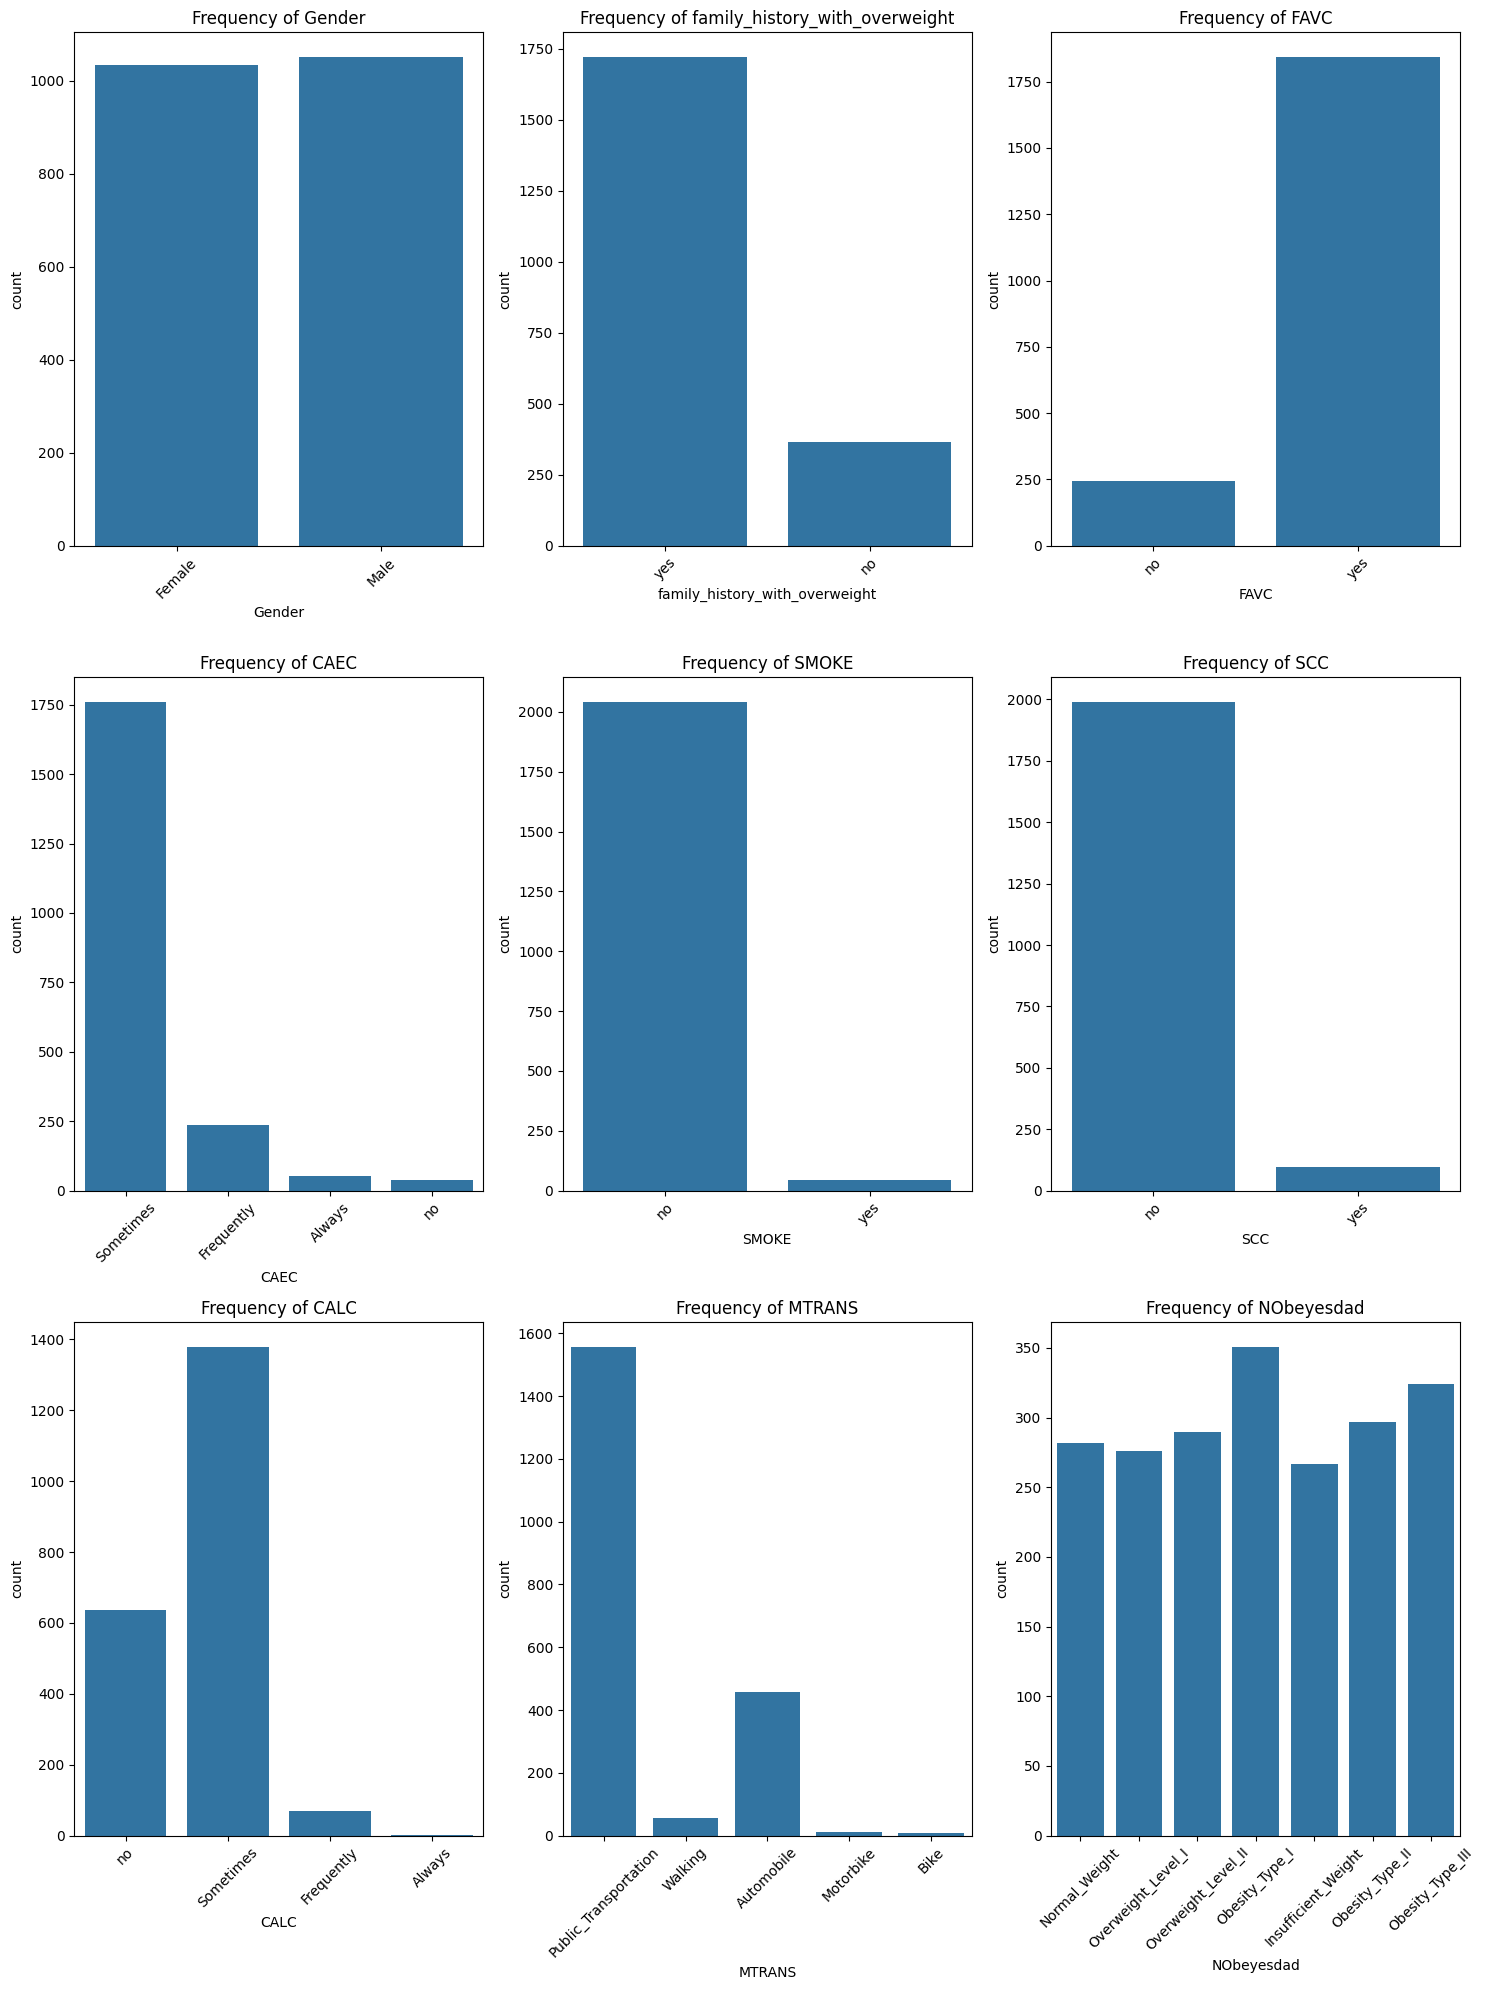

In [ ]:
#@title Visualización de variables categóricas
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()

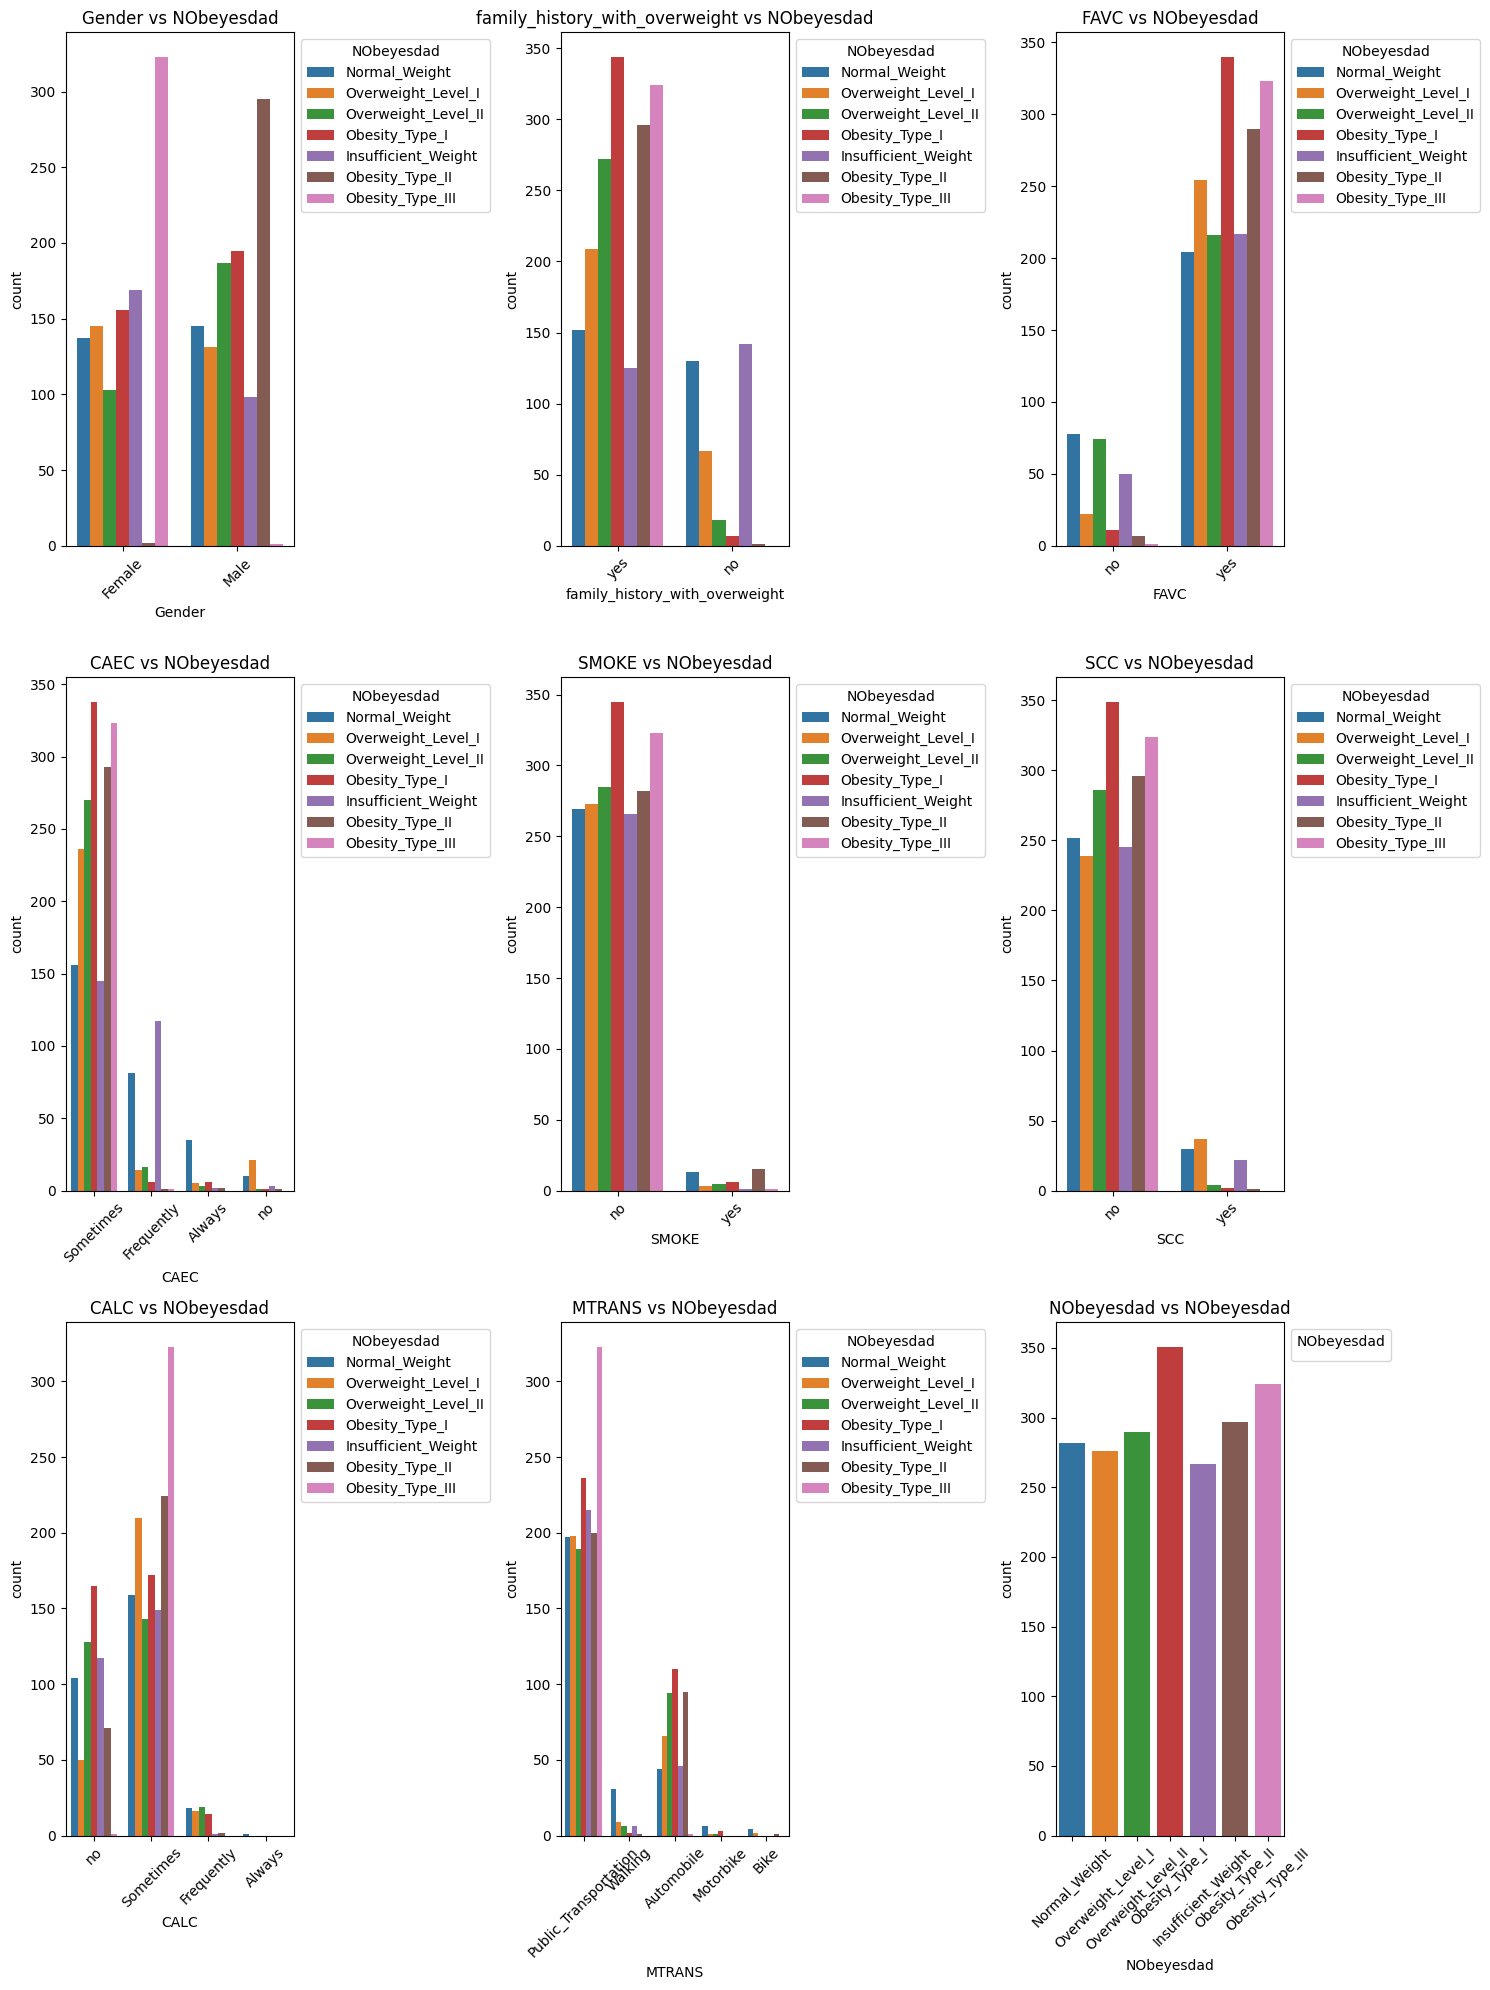

In [ ]:
# Configuración de los subplots para gráficos de barras
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue="NObeyesdad")
    plt.title(f'{col} vs NObeyesdad')
    plt.xticks(rotation=45)
    plt.legend(title="NObeyesdad", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

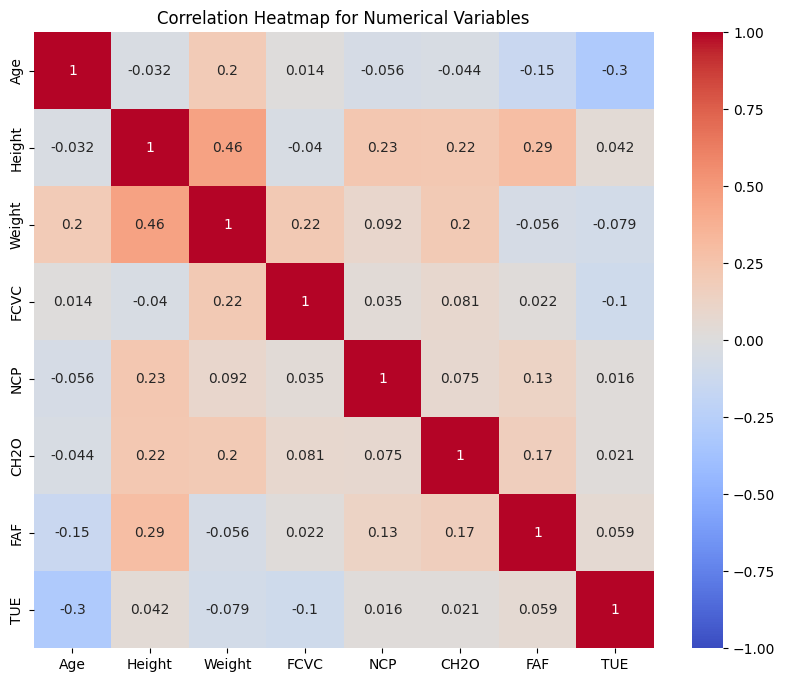

In [ ]:
##@title Mapa de calor de correlaciones entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

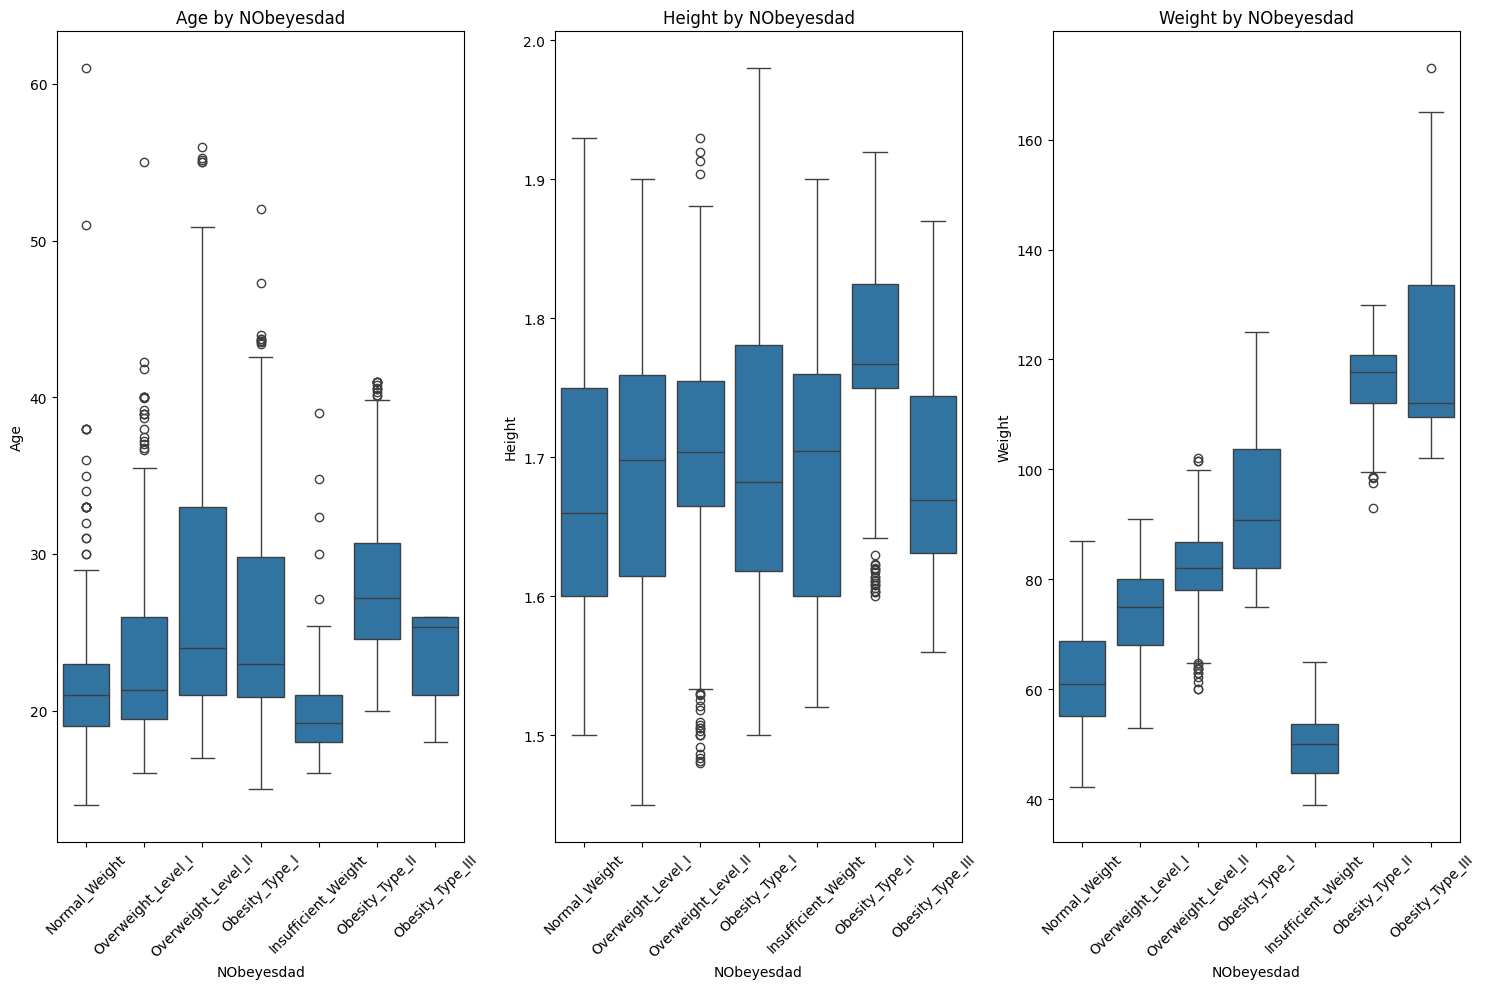

IQR para cada variable:
 Age        6.084063
Height     0.139313
Weight    42.015907
FCVC       1.000000
NCP        0.302533
CH2O       0.875271
FAF        1.553597
TUE        1.000000
dtype: float64
Tamaño original del dataset: (2087, 17)
Tamaño del dataset sin outliers: (1388, 17)


In [ ]:
#@title Boxplot de variables numéricas en función de NObeyesdad
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:3], 1):  # Usando las 3 principales para simplificar la visualización
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='NObeyesdad', y=col)
    plt.xticks(rotation=45)
    plt.title(f'{col} by NObeyesdad')
plt.tight_layout()
plt.show()

df_numeric_only = df[numerical_cols]

# Cálculo de los cuartiles y del IQR
Q1 = df_numeric_only.quantile(0.25)
Q3 = df_numeric_only.quantile(0.75)
IQR = Q3 - Q1

print("IQR para cada variable:\n", IQR)

# Máscara para identificar las filas que están dentro del rango sin outliers
mask = ~((df_numeric_only < (Q1 - 1.5 * IQR)) | (df_numeric_only > (Q3 + 1.5 * IQR)))

# Filtrar el DataFrame original para eliminar filas con outliers en cualquier columna numérica
df_cleaned = df[mask.all(axis=1)]

print("Tamaño original del dataset:", df.shape)
print("Tamaño del dataset sin outliers:", df_cleaned.shape)



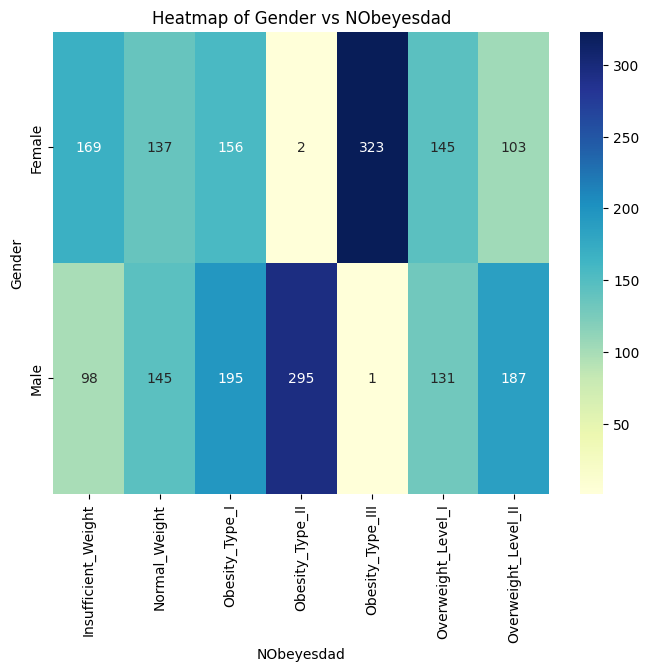

In [ ]:
#@title Tabla de contingencia entre 'Gender' y 'NObeyesdad'
contingency_table = pd.crosstab(df['Gender'], df['NObeyesdad'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Gender vs NObeyesdad")
plt.show()

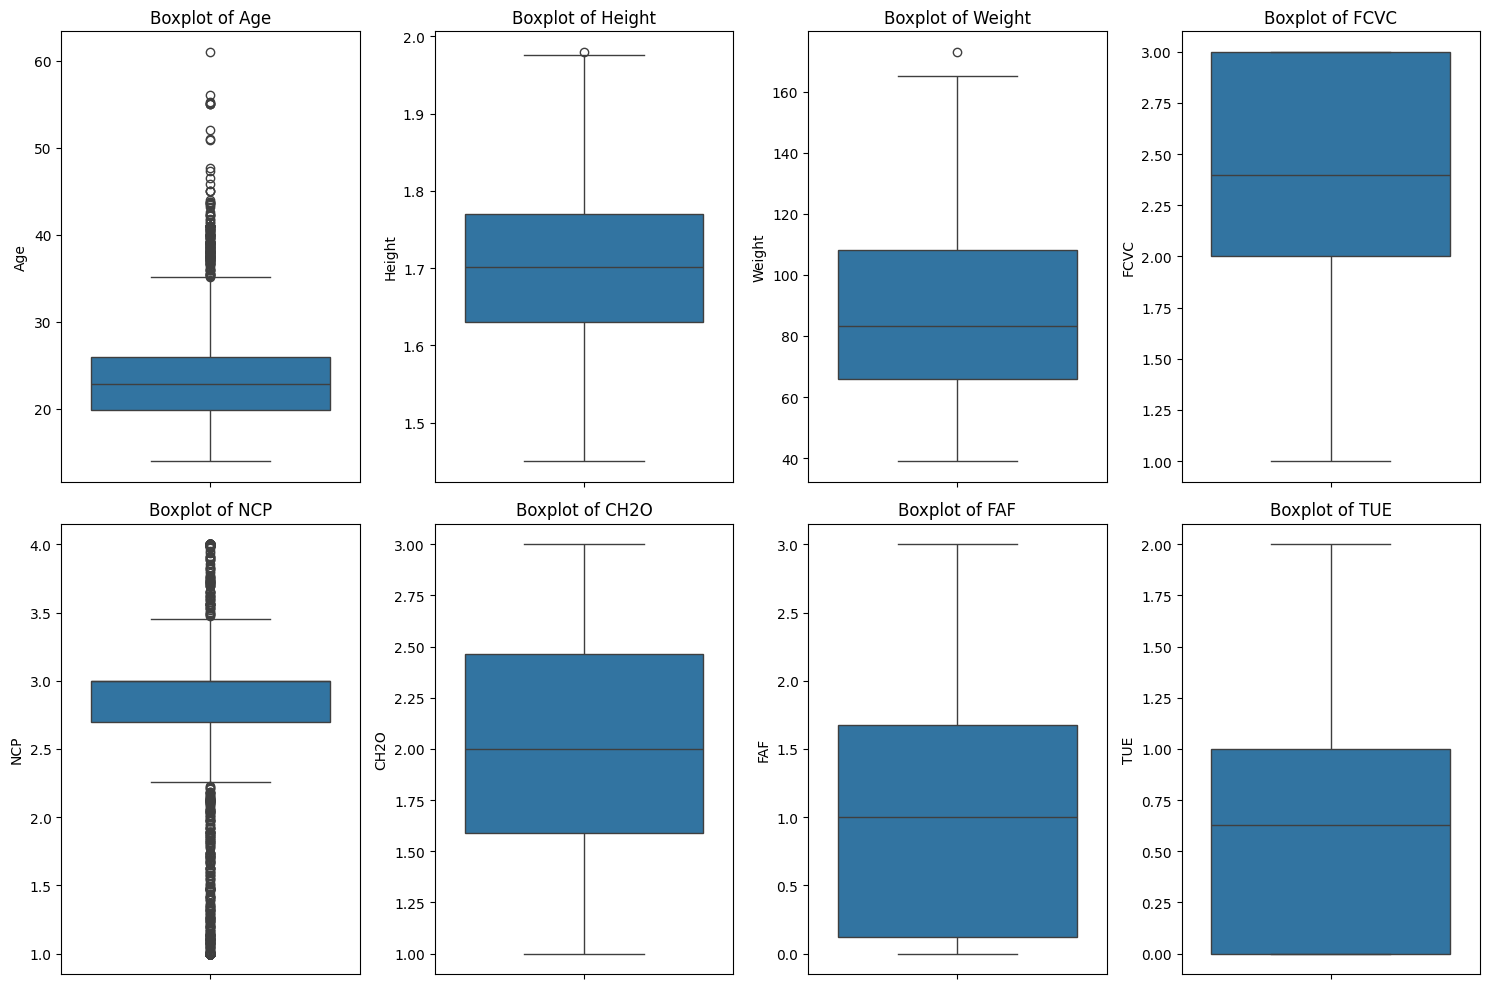

IQR para cada variable:
 Age        6.084063
Height     0.139313
Weight    42.015907
FCVC       1.000000
NCP        0.302533
CH2O       0.875271
FAF        1.553597
TUE        1.000000
dtype: float64
Tamaño original del dataset: (2087, 17)
Tamaño del dataset sin outliers: (1589, 17)


In [ ]:
#@title Eliminación de outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

df_numeric_only = df[numerical_cols]

# Cálculo de los cuartiles y del IQR
Q1 = df_numeric_only.quantile(0.25)
Q3 = df_numeric_only.quantile(0.75)
IQR = Q3 - Q1

print("IQR para cada variable:\n", IQR)

# Máscara para identificar las filas que están dentro del rango sin outliers
mask = ~((df_numeric_only < (Q1 - 2.5* IQR)) | (df_numeric_only > (Q3 + 2.5 * IQR)))

# Filtrar el DataFrame original para eliminar filas con outliers en cualquier columna numérica
df_cleaned = df[mask.all(axis=1)]

print("Tamaño original del dataset:", df.shape)
print("Tamaño del dataset sin outliers:", df_cleaned.shape)

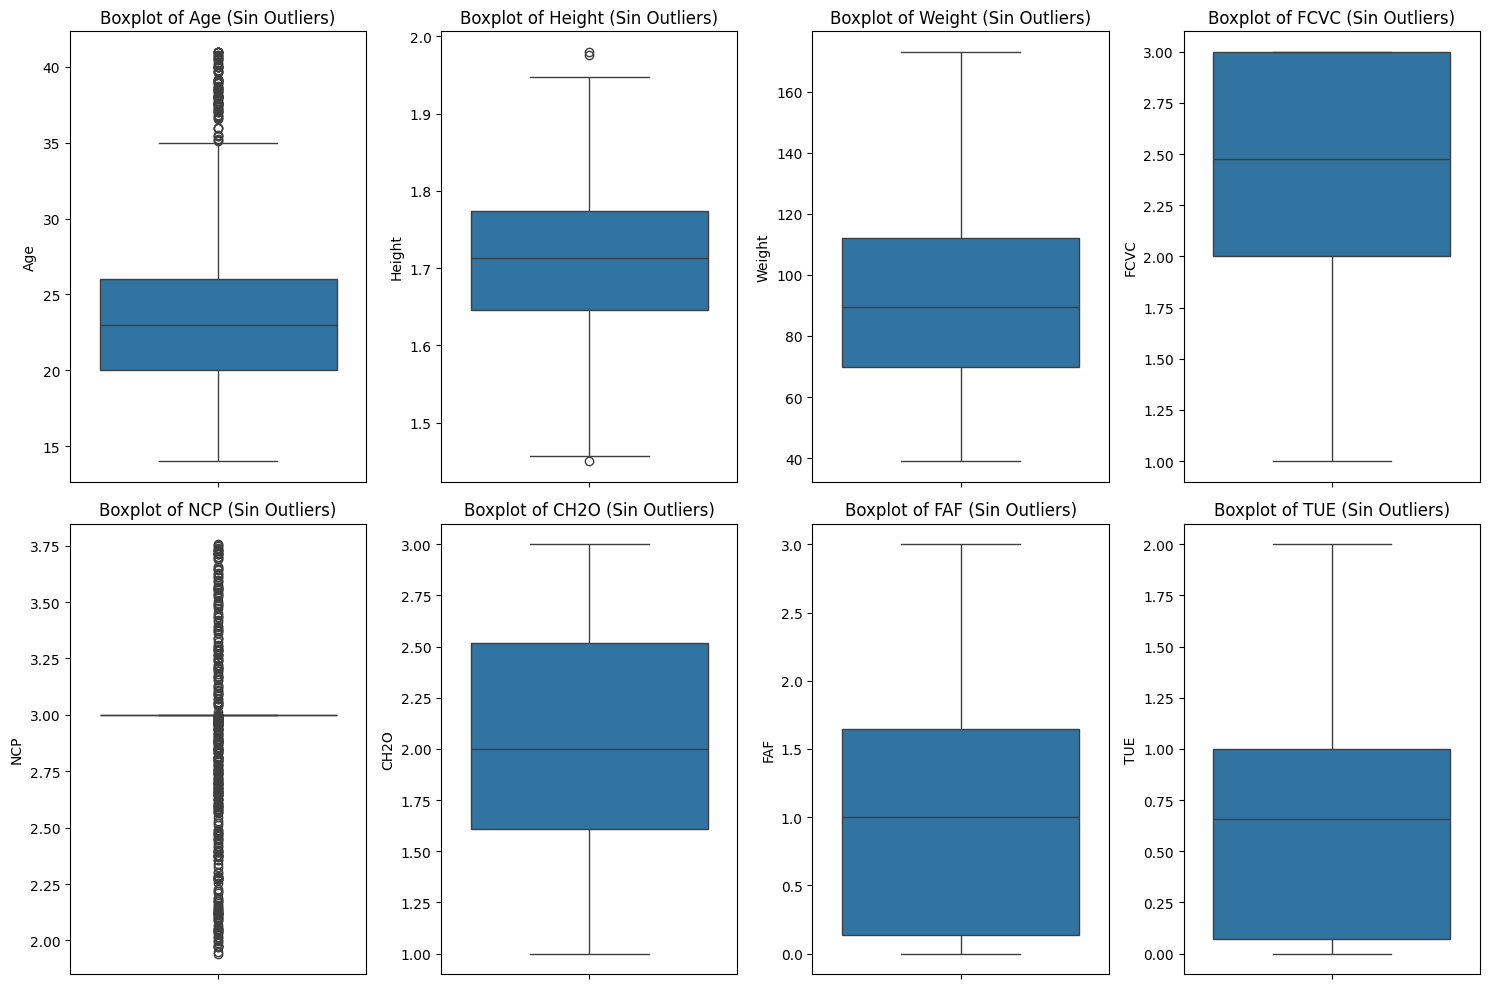

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(f'Boxplot of {col} (Sin Outliers)')
plt.tight_layout()
plt.show()